In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree 

In [2]:
data = pd.read_csv('Company_DataDecisionTree.csv')


In [3]:
print(data.head())


   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [4]:
print(data.describe())


            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

In [5]:
print(data.isnull().sum())


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


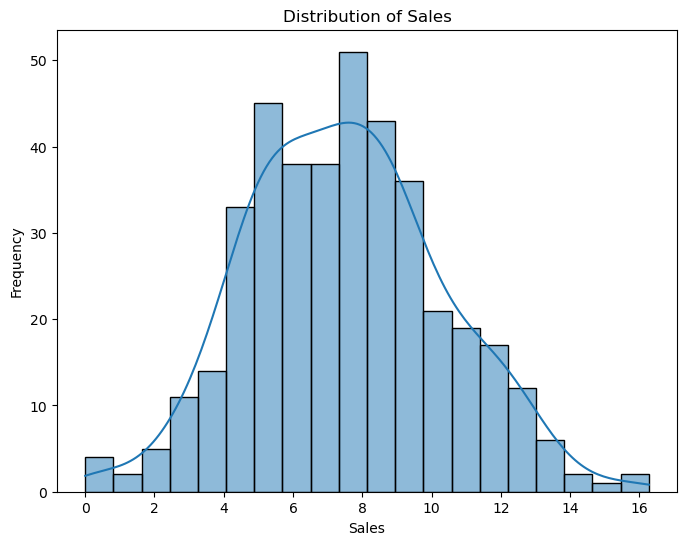

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

C:\Users\gkhya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


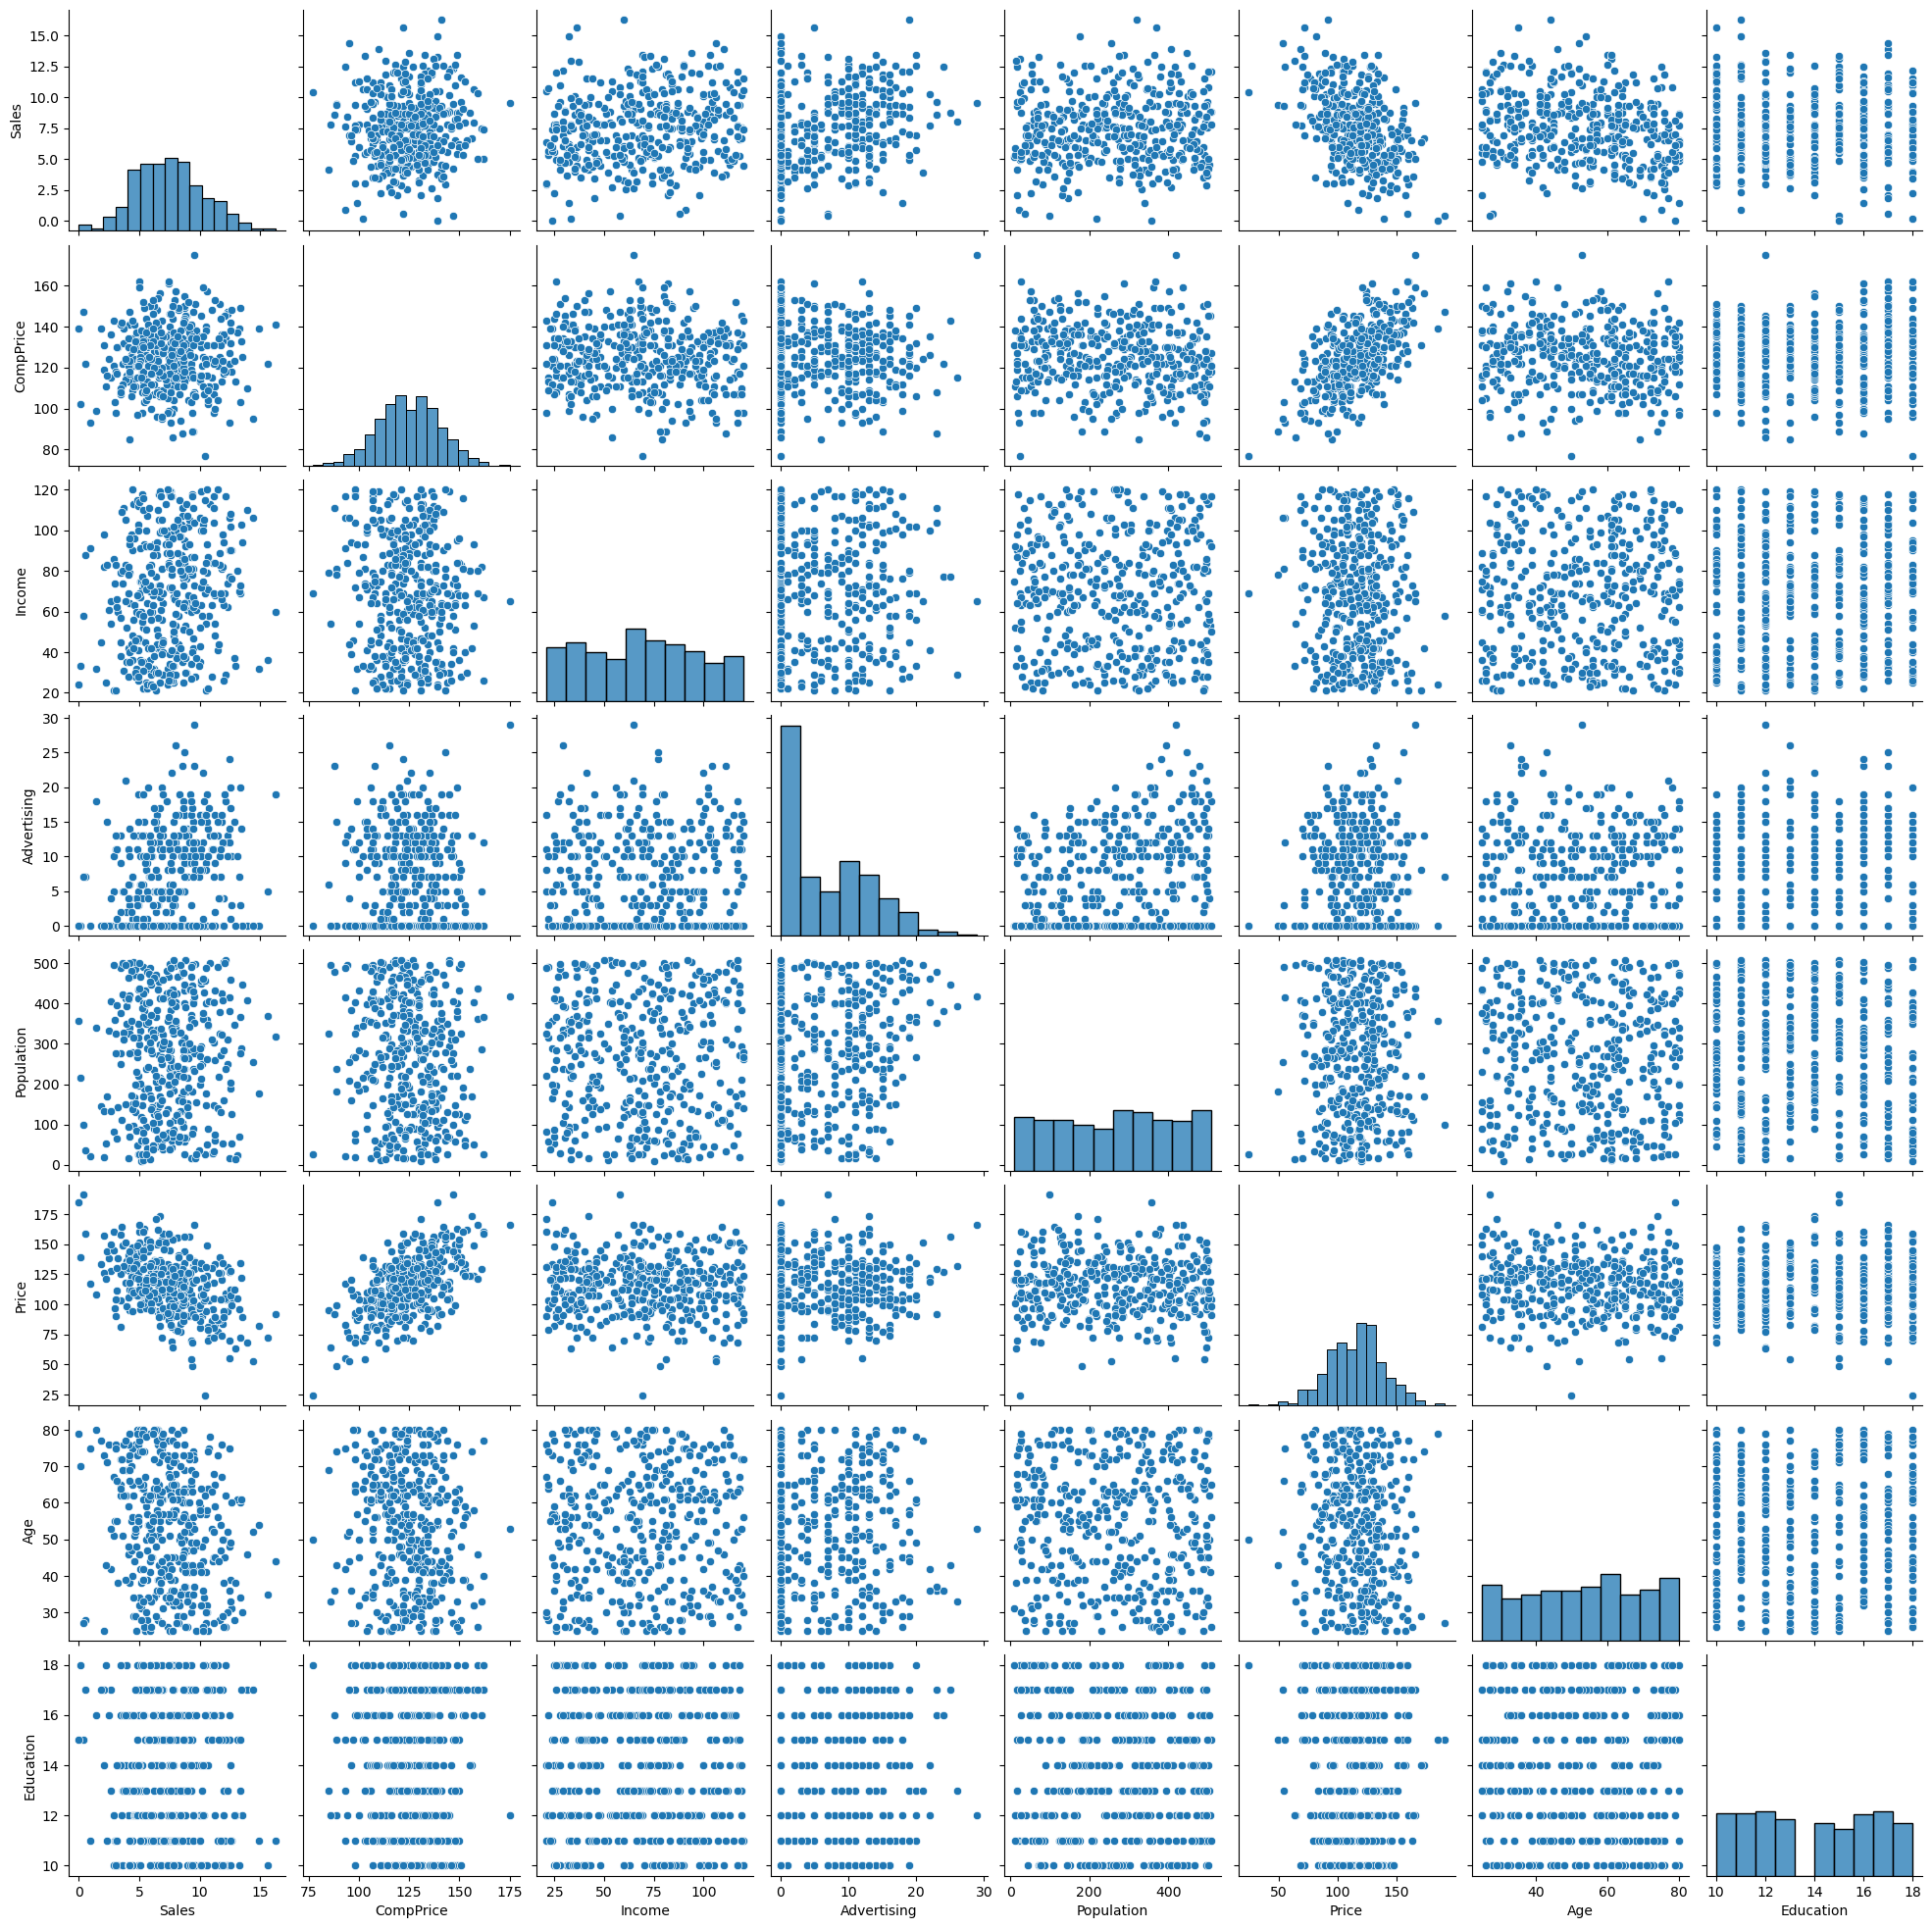

In [7]:
sns.pairplot(data)
plt.show()


C:\Users\gkhya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


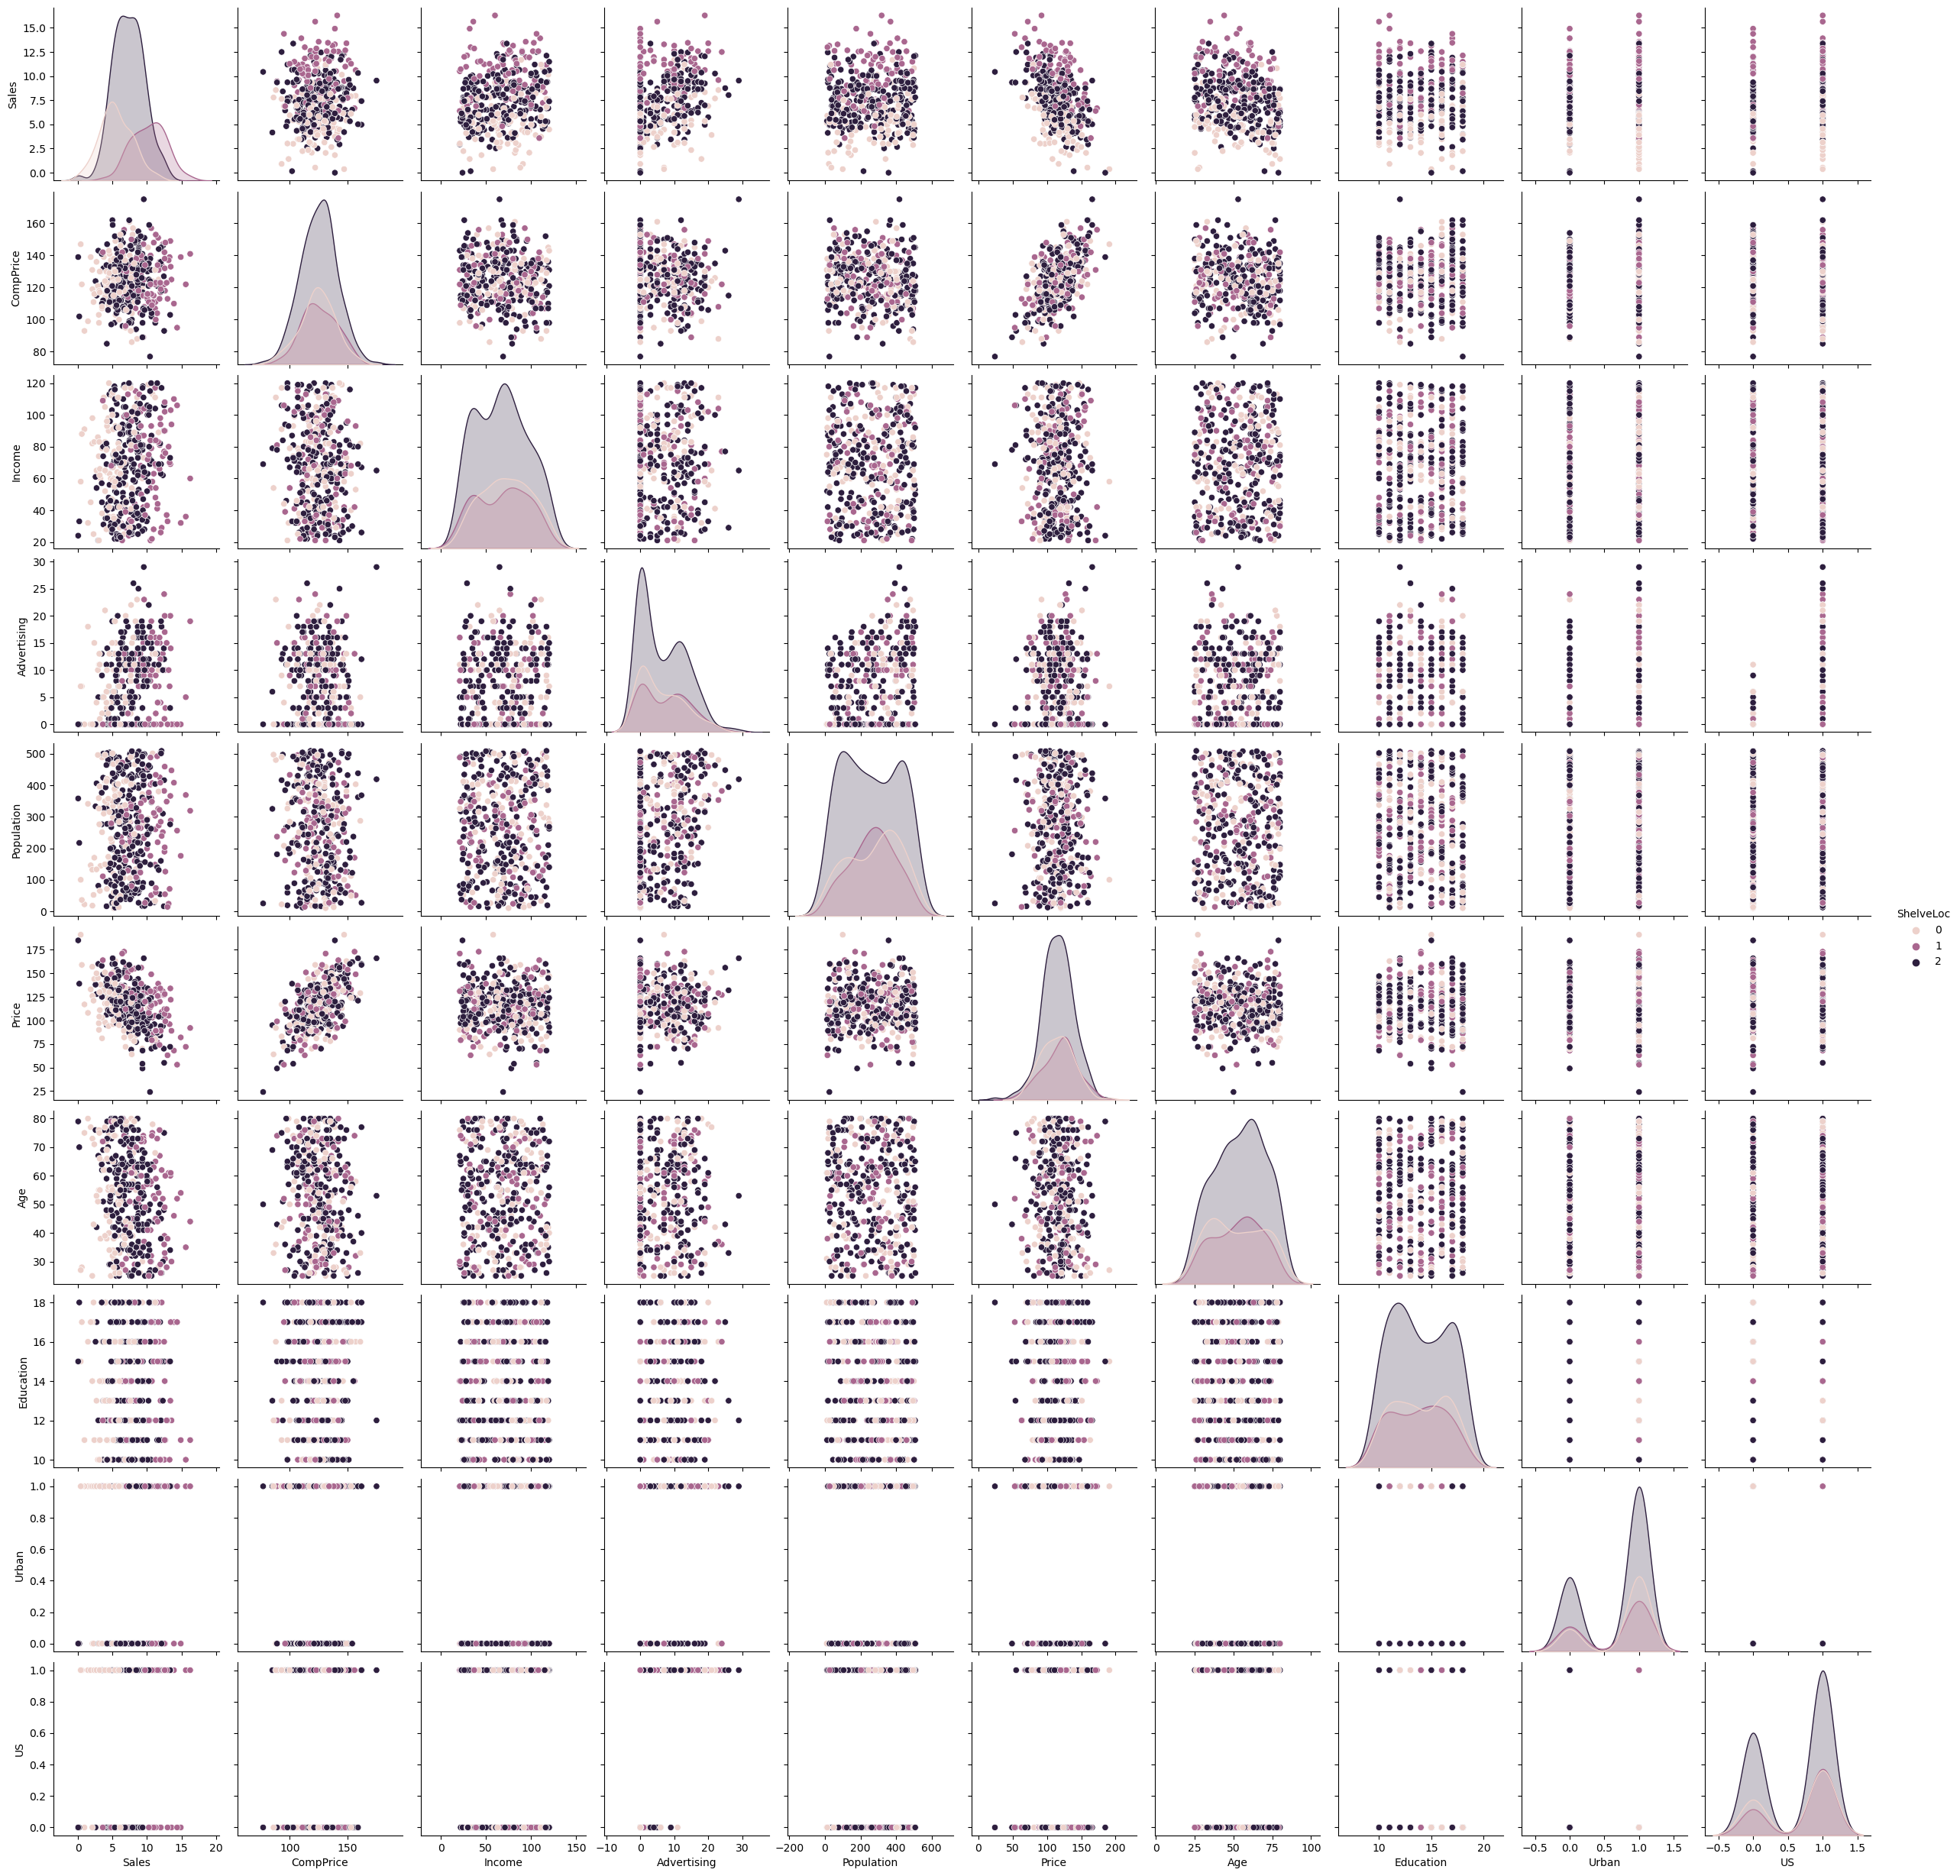

In [27]:
sns.pairplot(data=data, hue = 'ShelveLoc')

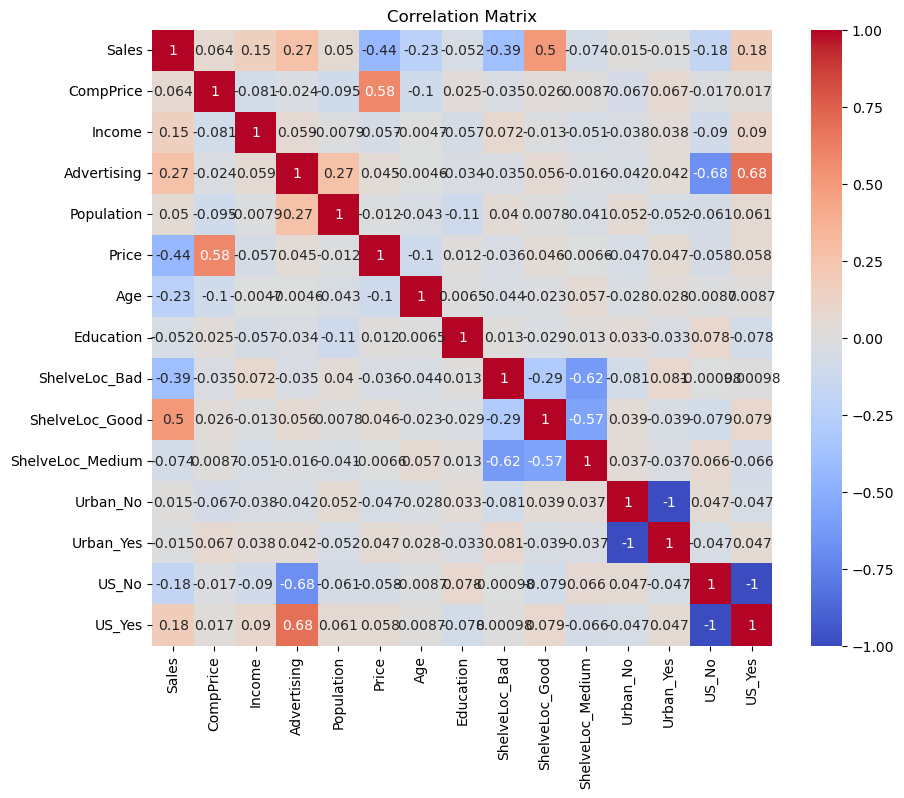

In [9]:

data_encoded = pd.get_dummies(data)

plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
threshold = data['Sales'].mean() 
data['Sale_Category'] = data['Sales'].apply(lambda x: 'High' if x > threshold else 'Low')


In [14]:
label_encoder = LabelEncoder()
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [15]:
X = data.drop(['Sales', 'Sale_Category'], axis=1)
y = data['Sale_Category']

In [16]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier()

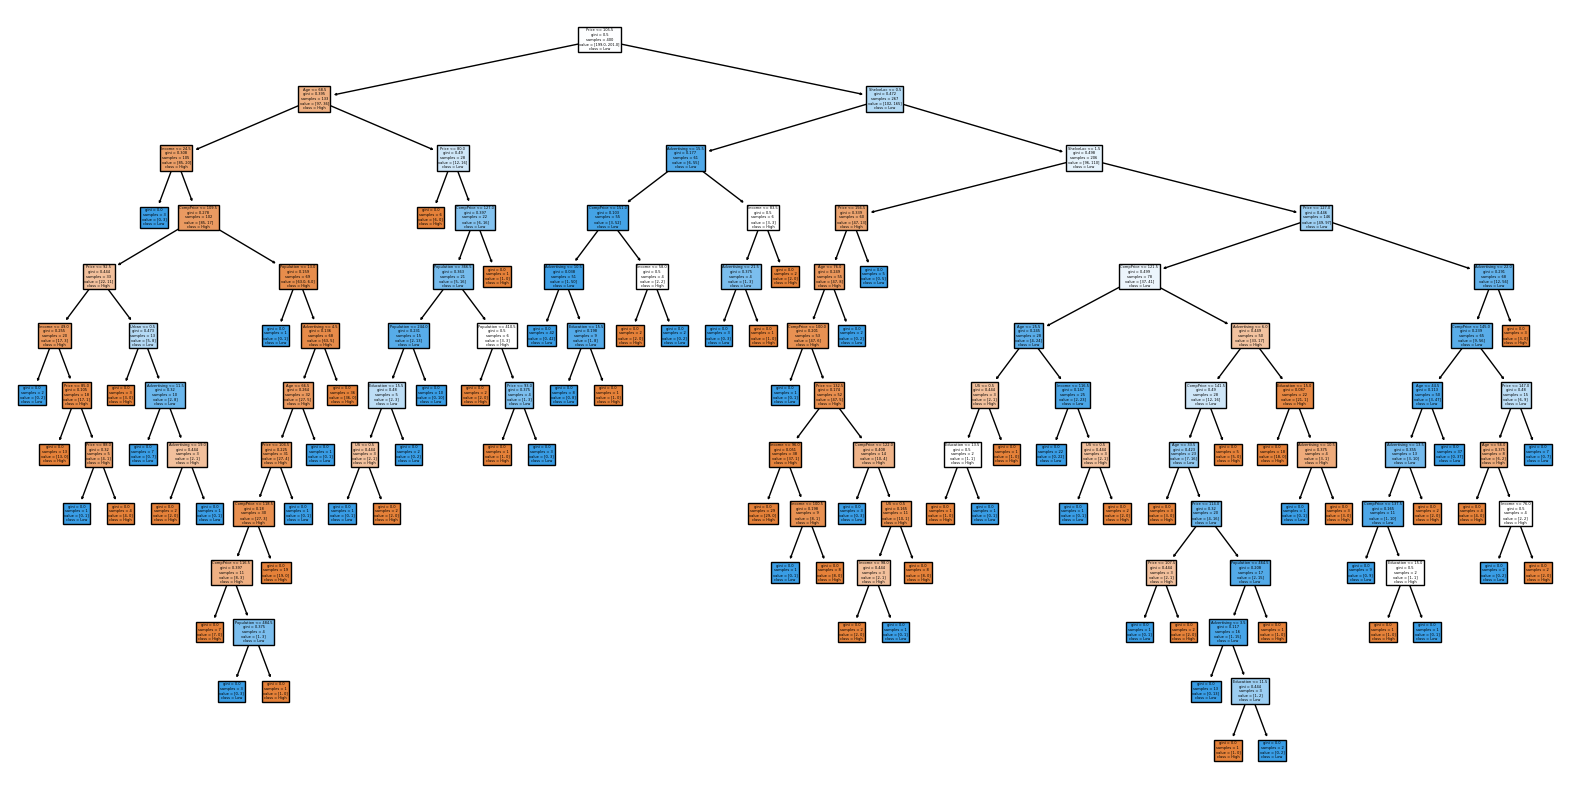

In [17]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=tree_model.classes_, filled=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
data['Sales_Category'] = pd.cut(data['Sales'], bins=[0, 7.5, 16], labels=['Low', 'High'])

In [20]:
X = data.drop(['Sales', 'Sales_Category'], axis=1)
y = data['Sales_Category']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Convert Sales into categorical variable
bins = [-np.inf, 5, 10, np.inf]  # Define the bin edges
labels = ['Low', 'Medium', 'High']  # Define the labels for each bin
data_encoded['Sale_Category'] = pd.cut(data_encoded['Sales'], bins=bins, labels=labels)

# Separate features (X) and target variable (y)
X = data_encoded.drop(['Sales', 'Sale_Category'], axis=1)  # Exclude 'Sales' and the new categorical variable
y = data_encoded['Sale_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the DecisionTreeClassifier with entropy criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Make predictions on the testing set using entropy criterion
y_pred_entropy = dt_entropy.predict(X_test)

# Calculate accuracy using entropy criterion
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy using entropy criterion:", accuracy_entropy)


Accuracy using entropy criterion: 0.675


In [34]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy using Gini impurity criterion:", accuracy_gini)

Accuracy using Gini impurity criterion: 0.6


In [39]:
x=data.iloc[:,0:6]
y=data['ShelveLoc']

In [40]:
x

Sales  CompPrice  Income  Advertising  Population  Price
0     9.50        138      73           11         276    120
1    11.22        111      48           16         260     83
2    10.06        113      35           10         269     80
3     7.40        117     100            4         466     97
4     4.15        141      64            3         340    128
..     ...        ...     ...          ...         ...    ...
395  12.57        138     108           17         203    128
396   6.14        139      23            3          37    120
397   7.41        162      26           12         368    159
398   5.94        100      79            7         284     95
399   9.71        134      37            0          27    120

[400 rows x 6 columns]

In [41]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [42]:
data['ShelveLoc'].unique()

array([0, 1, 2])

In [43]:
data.ShelveLoc.value_counts()


ShelveLoc
2    219
0     96
1     85
Name: count, dtype: int64

In [44]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [45]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
from sklearn import tree

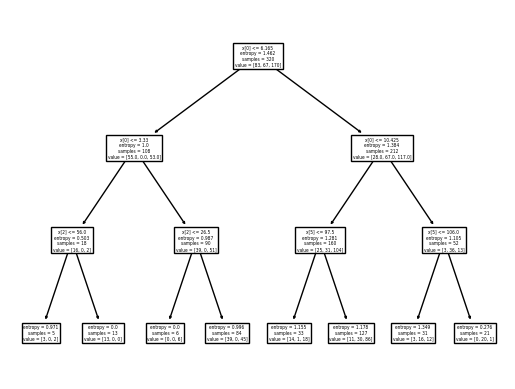

In [47]:
tree.plot_tree(model);

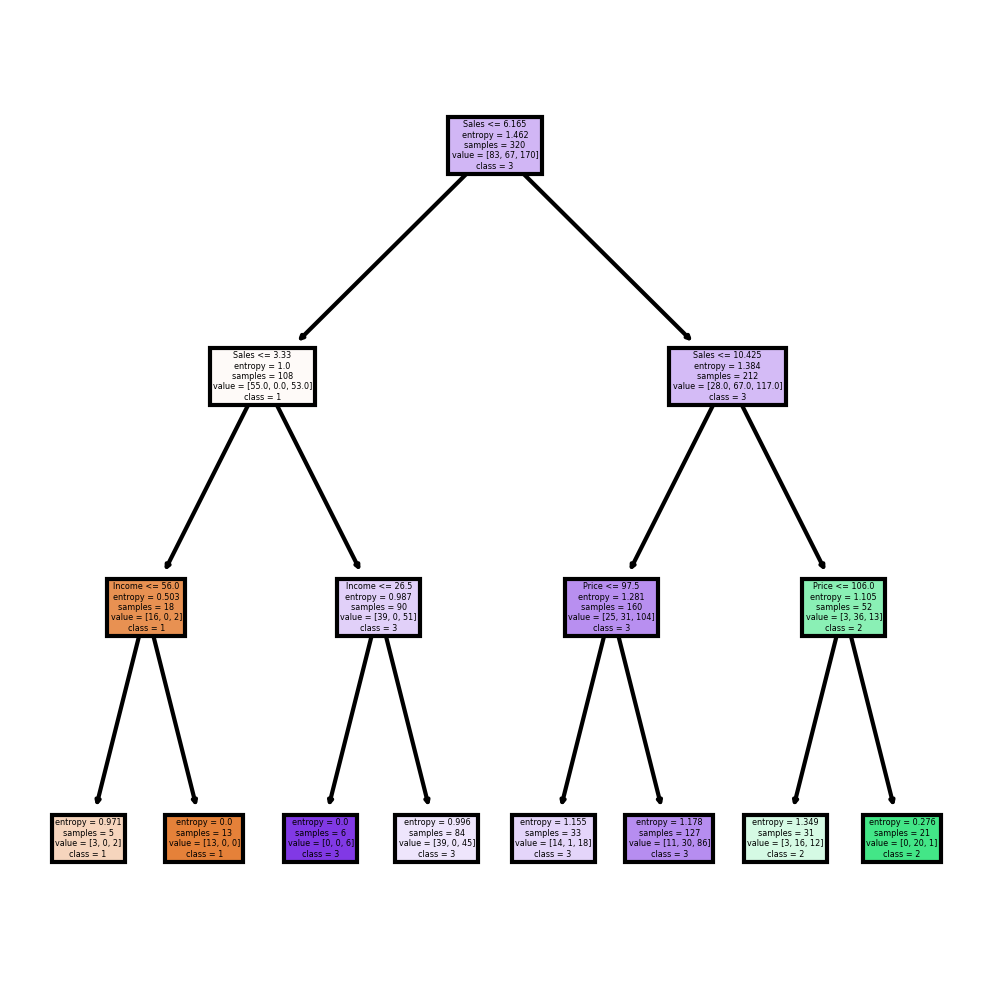

In [48]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [52]:
prediction = model.predict(x_test)
pd.Series(prediction).value_counts()


2    63
1    13
0     4
Name: count, dtype: int64

In [53]:
prediction

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [54]:
pd.crosstab(y_test,prediction) 

col_0      0  1   2
ShelveLoc          
0          1  0  12
1          0  8  10
2          3  5  41

In [55]:
 np.mean(prediction==y_test)

0.625

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [57]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
prediction=model.predict(x_test)
np.mean(prediction==y_test)

0.625

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [64]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [65]:
model.score(X_test,y_test)

-1.212506494697271